# **MILESTONE 3: Beyond Descriptive Stats**

In [28]:
!pip install matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

df_athlete = pd.read_csv("/Users/khangnguyen/Desktop/Coursera/SQL/athlete_events.csv")
df_region = pd.read_csv("/Users/khangnguyen/Desktop/Coursera/SQL/noc_regions.csv")

In [29]:
athlete = df_athlete[['Sex', 'Age', 'Height', 'Weight', 'NOC', 'Year', 'Season', 'City', 'Sport', 'Medal']]
athlete

,Sex,Age,Height,Weight,NOC,Year,Season,City,Sport,Medal
0,M,24.0,180.0,80.0,CHN,1992,Summer,Barcelona,Basketball,NaN
1,M,23.0,170.0,60.0,CHN,2012,Summer,London,Judo,NaN
2,M,24.0,NaN,NaN,DEN,1920,Summer,Antwerpen,Football,NaN
3,M,34.0,NaN,NaN,DEN,1900,Summer,Paris,Tug-Of-War,Gold
4,F,21.0,185.0,82.0,NED,1988,Winter,Calgary,Speed Skating,NaN
...,...,...,...,...,...,...,...,...,...,...
271111,M,29.0,179.0,89.0,POL,1976,Winter,Innsbruck,Luge,NaN
271112,M,27.0,176.0,59.0,POL,2014,Winter,Sochi,Ski Jumping,NaN
271113,M,27.0,176.0,59.0,POL,2014,Winter,Sochi,Ski Jumping,NaN
271114,M,30.0,185.0,96.0,POL,1998,Winter,Nagano,Bobsleigh,NaN


First, I will make adjustments to the dataset so that I can build a model to predict the possibility of getting a medal.

## 1. Change Medal to 0 (no medal) and 1 (gold, silver, or bronze medal) or easy generating models

In [30]:
athlete['Medal'] = athlete['Medal'].notna().astype(int)
country_chosen = athlete.groupby('NOC')['Medal'].sum().sort_values(ascending=False).head(40)
country_chosen = list(country_chosen.index)
athlete = athlete[athlete['NOC'].isin(country_chosen)]

/var/folders/kq/852l1l2s3tx46rk1nzjrrwh80000gn/T/ipykernel_21632/3792321870.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  athlete['Medal'] = athlete['Medal'].notna().astype(int)


In [31]:
mean_age = df_athlete.groupby(['Sport', 'Sex'])['Age'].transform('mean')
athlete['Age'] = athlete['Age'].fillna(mean_age)
athlete['Age'] = athlete['Age'].round(0).astype(int)

/var/folders/kq/852l1l2s3tx46rk1nzjrrwh80000gn/T/ipykernel_21632/4763331.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  athlete['Age'] = athlete['Age'].fillna(mean_age)
/var/folders/kq/852l1l2s3tx46rk1nzjrrwh80000gn/T/ipykernel_21632/4763331.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  athlete['Age'] = athlete['Age'].round(0).astype(int)


## 2. Fill NaN values of Height with appropriate mean values | Round to integers

In [32]:
mean_height = df_athlete.groupby(['Sport', 'NOC', 'Sex'])['Height'].transform('mean')
athlete['Height'] = athlete['Height'].fillna(mean_height)

mean_height = df_athlete.groupby(['Sport', 'NOC'])['Height'].transform('mean')
athlete['Height'] = athlete['Height'].fillna(mean_height)

mean_height = df_athlete.groupby(['NOC'])['Height'].transform('mean')
athlete['Height'] = athlete['Height'].fillna(mean_height)

mean_height = df_athlete['Height'].mean()
athlete['Height'] = athlete['Height'].fillna(mean_height)

athlete['Height'] = athlete['Height'].round(0).astype(int)

/var/folders/kq/852l1l2s3tx46rk1nzjrrwh80000gn/T/ipykernel_21632/3497794093.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  athlete['Height'] = athlete['Height'].fillna(mean_height)
/var/folders/kq/852l1l2s3tx46rk1nzjrrwh80000gn/T/ipykernel_21632/3497794093.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  athlete['Height'] = athlete['Height'].fillna(mean_height)
/var/folders/kq/852l1l2s3tx46rk1nzjrrwh80000gn/T/ipykernel_21632/3497794093.py:8: SettingWithCopyWarning: 
A value is trying to be set on a 

## 3. Fill NaN values of Weight with appropriate mean values | Round to integers

In [33]:
mean_weight = df_athlete.groupby(['Sport', 'NOC', 'Sex'])['Weight'].transform('mean')
athlete['Weight'] = athlete['Weight'].fillna(mean_weight)

mean_weight = df_athlete.groupby(['Sport', 'NOC'])['Weight'].transform('mean')
athlete['Weight'] = athlete['Weight'].fillna(mean_weight)

mean_weight = df_athlete.groupby(['NOC'])['Weight'].transform('mean')
athlete['Weight'] = athlete['Weight'].fillna(mean_weight)

mean_weight = df_athlete['Weight'].mean()
athlete['Weight'] = athlete['Weight'].fillna(mean_weight)

athlete['Weight'] = athlete['Weight'].round(0).astype(int)

/var/folders/kq/852l1l2s3tx46rk1nzjrrwh80000gn/T/ipykernel_21632/2401364783.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  athlete['Weight'] = athlete['Weight'].fillna(mean_weight)
/var/folders/kq/852l1l2s3tx46rk1nzjrrwh80000gn/T/ipykernel_21632/2401364783.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  athlete['Weight'] = athlete['Weight'].fillna(mean_weight)
/var/folders/kq/852l1l2s3tx46rk1nzjrrwh80000gn/T/ipykernel_21632/2401364783.py:8: SettingWithCopyWarning: 
A value is trying to be set on a 

In [34]:
athlete_2 = athlete

## 4. Further adjustment on dataset

In [12]:
sex_dummies = pd.get_dummies(athlete['Sex'])
athlete = pd.concat([athlete, sex_dummies], axis=1)
athlete.drop(['Sex'], axis=1, inplace=True)
athlete.drop(['F'], axis=1, inplace=True)

In [13]:
season_dummies = pd.get_dummies(athlete['Season'])
athlete = pd.concat([athlete, season_dummies], axis=1)
athlete.drop(['Season'], axis=1, inplace=True)
athlete.drop(['Winter'], axis=1, inplace=True)

In [14]:
sport_dummies = pd.get_dummies(athlete['Sport'])
athlete = pd.concat([athlete, sport_dummies], axis=1)
athlete.drop(['Sport'], axis=1, inplace=True)

In [15]:
noc_dummies = pd.get_dummies(athlete['NOC'])
athlete = pd.concat([athlete, noc_dummies], axis=1)
athlete.drop(['NOC'], axis=1, inplace=True)

In [16]:
athlete.drop(['City'], axis=1, inplace=True)

In [17]:
athlete['BMI'] = athlete['Weight'] / (athlete['Height']/100)**2

In [18]:
athlete.rename(columns={'M': 'Male'}, inplace=True)
athlete['Male'] = athlete['Male'].astype(int)

In [19]:
corr_with_target = athlete.corr()['Medal'].sort_values(ascending=False)
print(corr_with_target.head(10))

Medal       1.000000
URS         0.116566
USA         0.103681
Height      0.089334
Weight      0.087269
Rowing      0.070232
GDR         0.061179
Rugby       0.056943
Football    0.056351
Summer      0.053691
Name: Medal, dtype: float64


From this, we could say that athletes from URS have a higher chance to get a medal.
USA nationality, height, and weight also have effect on the chance of getting a medal but not much.

## Setting up and splitting dataset

Next, I will split the dataset into 2 parts, with 20% of it is for testing and 80% is for training.

In [103]:
X = athlete.drop(columns='Medal')
Y = athlete['Medal'].to_numpy()

In [104]:
transform = preprocessing.StandardScaler()
X = transform.fit_transform(X)

In [105]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

## **Logistic Regression**

The first model I would like to build is logistic regression. I do not think it is appropriate since the score is really low.

### Build model

In [62]:
lr = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
parameters = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs']
}

logreg_cv = GridSearchCV(lr, parameters, cv=10, scoring='f1', n_jobs=-1, verbose=2)
logreg_cv.fit(X_train, Y_train)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


GridSearchCV(cv=10,
             estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=1000, random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10], 'penalty': ['l2'],
                         'solver': ['lbfgs']},
             scoring='f1', verbose=2)

In [63]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.3969929018994614


### Check with test dataset

In [64]:
logreg_cv.score(X_test, Y_test)

0.406796355577444

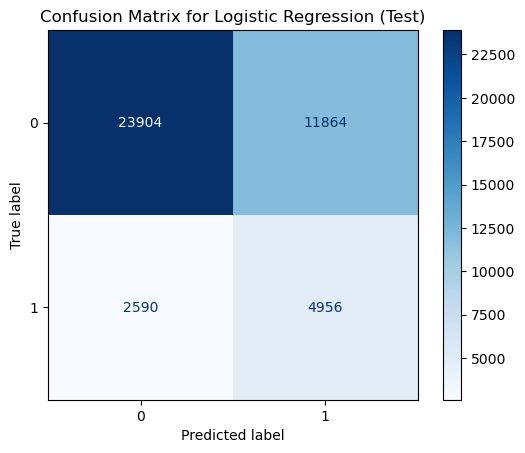

In [65]:
yhat_logreg_test=logreg_cv.predict(X_test)
cm = confusion_matrix(Y_test, yhat_logreg_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot(cmap=plt.cm.Blues)
plt.title(f"Confusion Matrix for Logistic Regression (Test)")
plt.show()

### Check again with train dataset to prevent overfitting

In [66]:
logreg_cv.score(X_train, Y_train)

0.3979539006357819

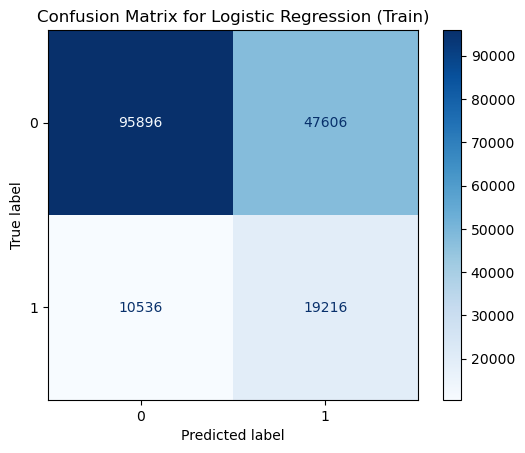

In [67]:
yhat_logreg_train=logreg_cv.predict(X_train)
cm = confusion_matrix(Y_train, yhat_logreg_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot(cmap=plt.cm.Blues)
plt.title(f"Confusion Matrix for Logistic Regression (Train)")
plt.show()

## **Tree Classification**

Next, I have tree classification. Before tarting, I believe that this is the best model since my dataset has so many categories. And the result proved that. 84% of the test dataset is true while 86% was true on the training dataset when checking for overfitting.

### Build model

In [68]:
parameters = {'criterion': ['gini'],
     'splitter': ['best'],
     'max_depth': [25, 30, 35],
     'max_features': ['sqrt'],
     'min_samples_leaf': [3, 4, 5],
     'min_samples_split': [10, 20, 30]}

tree = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree, parameters, cv=5)
tree_cv.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini'], 'max_depth': [25, 30, 35],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [10, 20, 30],
                         'splitter': ['best']})

In [69]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 20, 'splitter': 'best'}
accuracy : 0.8438246723471392


### Check with test dataset

In [70]:
tree_cv.score(X_test, Y_test)

0.8433070138985086

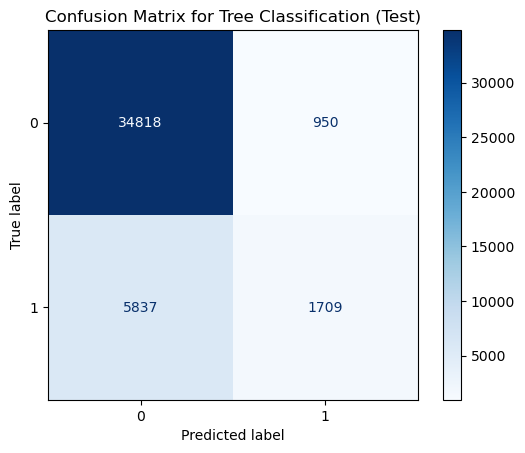

In [71]:
yhat_tree_test = tree_cv.predict(X_test)
cm = confusion_matrix(Y_test, yhat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot(cmap=plt.cm.Blues)
plt.title(f"Confusion Matrix for Tree Classification (Test)")
plt.show()

### Check again with train dataset to prevent overfitting

In [72]:
tree_cv.score(X_train, Y_train)

0.8581273736825701

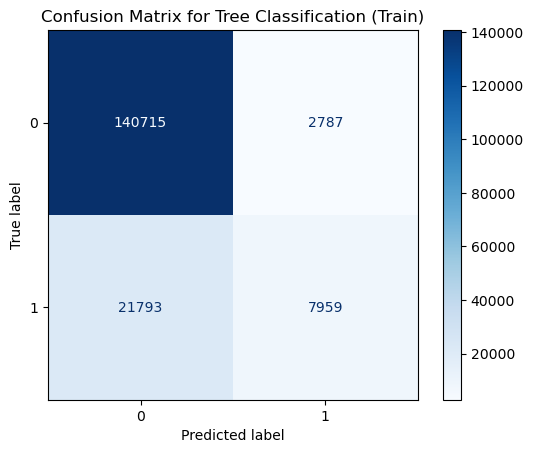

In [73]:
yhat_tree_train = tree_cv.predict(X_train)
cm = confusion_matrix(Y_train, yhat_tree_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot(cmap=plt.cm.Blues)
plt.title(f"Confusion Matrix for Tree Classification (Train)")
plt.show()

## **KNeighbors Classifier**

The third model is KNN. This took me so long to check all the combinations of parameters, so I used Halving GridSearch CV, which eliminates bad modules each round.
The result was neutral, with 52% on testing dataset, just a bit over the average. The performance also showed that there was overfitting. When I tested again on training dataset, the result was unreasonable, with 87%.

### Build model

In [25]:
from sklearn.experimental import enable_halving_search_cv 
from sklearn.model_selection import HalvingGridSearchCV
parameters = {'n_neighbors': [3, 5, 7, 9, 11],
              'weights': ['distance'],
              'algorithm': ['auto'],
              'p': [1,2]}

KNN = KNeighborsClassifier()
knn_cv = HalvingGridSearchCV(KNN, parameters, cv=5, scoring='f1', verbose=2)
knn_cv.fit(X_train, Y_train)

n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 3
min_resources_: 19250
max_resources_: 173254
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 10
n_resources: 19250
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END algorithm=auto, n_neighbors=3, p=1, weights=distance; total time=   0.6s
[CV] END algorithm=auto, n_neighbors=3, p=1, weights=distance; total time=   0.6s
[CV] END algorithm=auto, n_neighbors=3, p=1, weights=distance; total time=   0.6s
[CV] END algorithm=auto, n_neighbors=3, p=1, weights=distance; total time=   0.6s
[CV] END algorithm=auto, n_neighbors=3, p=1, weights=distance; total time=   0.6s
[CV] END algorithm=auto, n_neighbors=3, p=2, weights=distance; total time=   0.1s
[CV] END algorithm=auto, n_neighbors=3, p=2, weights=distance; total time=   0.1s
[CV] END algorithm=auto, n_neighbors=3, p=2, weights=distance; total time=   0.1s
[CV] END algorithm=auto, n_neighbors=3, p=2, weights=distance; total time=   

Exception ignored in: <function ResourceTracker.__del__ at 0x1118ddbc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x1125e9bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END ...................C=0.01, penalty=l2, solver=lbfgs; total time=   0.7s
[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time=   0.9s
[CV] END ......................C=1, penalty=l2, solver=lbfgs; total time=   1.0s
[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=   0.9s
[CV] END ...................C=0.01, penalty=l2, solver=lbfgs; total time=   0.8s
[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time=   0.8s
[CV] END ......................C=1, penalty=l2, solver=lbfgs; total time=   0.8s
[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=   1.0s


Exception ignored in: <function ResourceTracker.__del__ at 0x105111bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x107d21bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END ...................C=0.01, penalty=l2, solver=lbfgs; total time=   0.8s
[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time=   0.8s
[CV] END ......................C=1, penalty=l2, solver=lbfgs; total time=   1.0s
[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=   0.9s
[CV] END ...................C=0.01, penalty=l2, solver=lbfgs; total time=   0.8s
[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time=   0.8s
[CV] END ......................C=1, penalty=l2, solver=lbfgs; total time=   0.9s
[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=   0.9s


Exception ignored in: <function ResourceTracker.__del__ at 0x103849bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x1106d1bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END ...................C=0.01, penalty=l2, solver=lbfgs; total time=   0.8s
[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time=   0.9s
[CV] END ......................C=1, penalty=l2, solver=lbfgs; total time=   0.9s
[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=   0.9s
[CV] END ...................C=0.01, penalty=l2, solver=lbfgs; total time=   0.8s
[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time=   0.9s
[CV] END ......................C=1, penalty=l2, solver=lbfgs; total time=   0.9s
[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=   0.9s


Exception ignored in: <function ResourceTracker.__del__ at 0x1109d1bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x103951bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END ...................C=0.01, penalty=l2, solver=lbfgs; total time=   0.9s
[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time=   0.9s
[CV] END ......................C=1, penalty=l2, solver=lbfgs; total time=   1.0s
[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=   0.8s
[CV] END ...................C=0.01, penalty=l2, solver=lbfgs; total time=   0.8s
[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time=   0.9s
[CV] END ......................C=1, penalty=l2, solver=lbfgs; total time=   1.1s
[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=   0.8s


Exception ignored in: <function ResourceTracker.__del__ at 0x104911bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x105065bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END algorithm=auto, n_neighbors=5, p=1, weights=distance; total time=   4.5s
[CV] END algorithm=auto, n_neighbors=5, p=1, weights=distance; total time=   4.7s
[CV] END algorithm=auto, n_neighbors=5, p=1, weights=distance; total time=   4.7s
[CV] END algorithm=auto, n_neighbors=3, p=1, weights=distance; total time=   4.5s
[CV] END algorithm=auto, n_neighbors=3, p=1, weights=distance; total time=   4.6s
[CV] END algorithm=auto, n_neighbors=3, p=1, weights=distance; total time=   4.5s
[CV] END algorithm=auto, n_neighbors=3, p=1, weights=distance; total time=   5.4s
[CV] END algorithm=auto, n_neighbors=3, p=1, weights=distance; total time=   5.0s
----------
iter: 2
n_candidates: 2
n_resources: 173250
Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] END algorithm=auto, n_neighbors=7, p=1, weights=distance; total time=  43.3s
[CV] END algorithm=auto, n_neighbors=7, p=1, weights=distance; total time=  42.4s
[CV] END algorithm=auto, n_neighbors=7, p=1, weights=distance; to

HalvingGridSearchCV(estimator=KNeighborsClassifier(),
                    param_grid={'algorithm': ['auto'],
                                'n_neighbors': [3, 5, 7, 9, 11], 'p': [1, 2],
                                'weights': ['distance']},
                    scoring='f1', verbose=2)

In [27]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 7, 'p': 1, 'weights': 'distance'}
accuracy : 0.5202778252281568


### Check with test dataset

In [28]:
knn_cv.score(X_test, Y_test)

0.5302360434619707

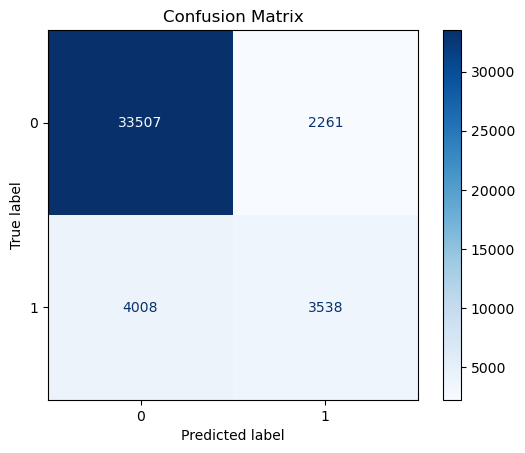

In [29]:
yhat = knn_cv.predict(X_test)
cm = confusion_matrix(Y_test, yhat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot(cmap=plt.cm.Blues)
plt.title(f"Confusion Matrix")
plt.show()

### Check again with train dataset to prevent overfitting

In [30]:
knn_cv.score(X_train, Y_train)

0.8677211438731663

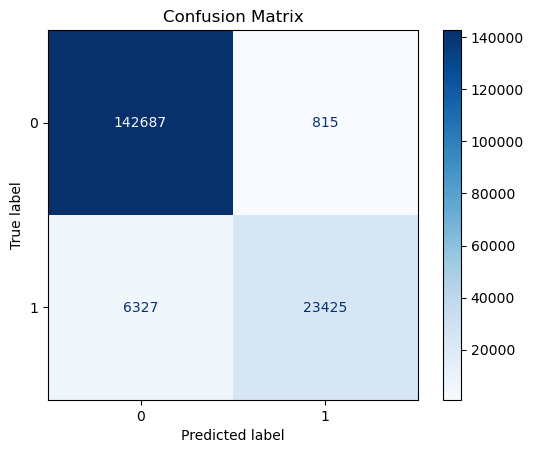

In [32]:
yhat = knn_cv.predict(X_train)
cm = confusion_matrix(Y_train, yhat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot(cmap=plt.cm.Blues)
plt.title(f"Confusion Matrix")
plt.show()

## **Support Vector Model**

There was not enough time to run both linear and polynomial model in one GridSearch so I splitted this part into 2 smaller models.

### **Linear**

I do not want to waste time for the linear relation since there are so many categories in my dataset. But I still check and got roughly 40% for both test, which was pretty bad.

### Build model

In [91]:
from sklearn.svm import LinearSVC
parameters = {'C': [0.01, 0.1, 1]}

linearsvm = LinearSVC(class_weight='balanced', random_state=42, max_iter=2000)

linearsvm_cv = HalvingGridSearchCV(linearsvm, parameters, cv=5, scoring='f1', n_jobs=-1, verbose=2)

X_sub, _, y_sub, _ = train_test_split(X_train, Y_train, train_size=0.2, stratify=Y_train, random_state=42)

linearsvm_cv.fit(X_sub, y_sub)

n_iterations: 2
n_required_iterations: 2
n_possible_iterations: 2
min_resources_: 11550
max_resources_: 34650
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 3
n_resources: 11550
Fitting 5 folds for each of 3 candidates, totalling 15 fits
----------
iter: 1
n_candidates: 1
n_resources: 34650
Fitting 5 folds for each of 1 candidates, totalling 5 fits


HalvingGridSearchCV(estimator=LinearSVC(class_weight='balanced', max_iter=2000,
                                        random_state=42),
                    n_jobs=-1, param_grid={'C': [0.01, 0.1, 1]}, scoring='f1',
                    verbose=2)

In [92]:
print("Best parameters:", linearsvm_cv.best_params_)
print("accuracy :",linearsvm_cv.best_score_)

Best parameters: {'C': 1}
accuracy : 0.39717836415278174


### Check with test dataset

In [93]:
linearsvm_cv.score(X_test, Y_test)

0.40523788021838186

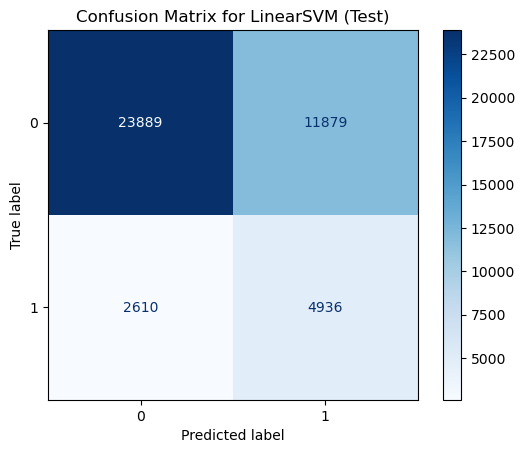

In [94]:
yhat_linearsvm_test=linearsvm_cv.predict(X_test)
cm = confusion_matrix(Y_test, yhat_linearsvm_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot(cmap=plt.cm.Blues)
plt.title(f"Confusion Matrix for LinearSVM (Test)")
plt.show()

### Check again with train dataset to prevent overfitting

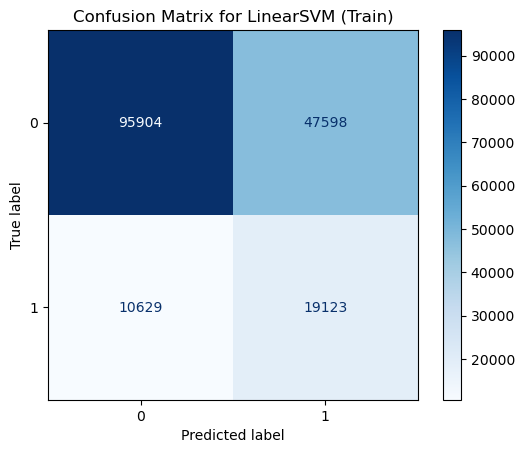

In [95]:
yhat_linearsvm_train=linearsvm_cv.predict(X_train)
cm = confusion_matrix(Y_train, yhat_linearsvm_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot(cmap=plt.cm.Blues)
plt.title(f"Confusion Matrix for LinearSVM (Train)")
plt.show()

### **Non - Linear**

I thought this model was far better than linear. But when I trained, I realized it just improves the result a little bit, with around 50%.

### Build model

In [106]:
parameters = {
    'kernel': ['rbf'],
    'C': [0.01, 0.1, 1],
    'gamma': ['scale']
}

svm = SVC(class_weight='balanced', random_state=42)
svm_cv = HalvingGridSearchCV(svm, parameters, cv=5, scoring='f1', n_jobs=-1, verbose=2)

svm_cv.fit(X_train, Y_train)

n_iterations: 2
n_required_iterations: 2
n_possible_iterations: 2
min_resources_: 57751
max_resources_: 173254
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 3
n_resources: 57751
Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END ....................C=0.01, gamma=scale, kernel=rbf; total time=12.5min


Exception ignored in: <function ResourceTracker.__del__ at 0x110711bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END ....................C=0.01, gamma=scale, kernel=rbf; total time=12.5min


Exception ignored in: <function ResourceTracker.__del__ at 0x104fd1bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END ....................C=0.01, gamma=scale, kernel=rbf; total time=12.5min


Exception ignored in: <function ResourceTracker.__del__ at 0x106811bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END ....................C=0.01, gamma=scale, kernel=rbf; total time=12.6min


Exception ignored in: <function ResourceTracker.__del__ at 0x102745bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END ....................C=0.01, gamma=scale, kernel=rbf; total time=12.6min


Exception ignored in: <function ResourceTracker.__del__ at 0x1048e5bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


----------
iter: 1
n_candidates: 1
n_resources: 173253
Fitting 5 folds for each of 1 candidates, totalling 5 fits


Exception ignored in: <function ResourceTracker.__del__ at 0x105191bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x107541bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x1048c1bc0>
Traceback (most recent call last

[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=10.3min
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=10.0min
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=75.1min


Exception ignored in: <function ResourceTracker.__del__ at 0x122065bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=10.3min
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time= 9.9min
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=74.5min


Exception ignored in: <function ResourceTracker.__del__ at 0x10616dbc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=10.4min
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time= 9.3min
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=75.6min


Exception ignored in: <function ResourceTracker.__del__ at 0x103039bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=10.3min
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=10.1min
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=77.0min


Exception ignored in: <function ResourceTracker.__del__ at 0x10586dbc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=10.5min
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=10.0min
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=79.2min


Exception ignored in: <function ResourceTracker.__del__ at 0x103765bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


HalvingGridSearchCV(estimator=SVC(class_weight='balanced', random_state=42),
                    n_jobs=-1,
                    param_grid={'C': [0.01, 0.1, 1], 'gamma': ['scale'],
                                'kernel': ['rbf']},
                    scoring='f1', verbose=2)

In [107]:
print("Best parameters:", svm_cv.best_params_)
print("accuracy :", svm_cv.best_score_)

Best parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
accuracy : 0.48786671689611083


### Check with test dataset

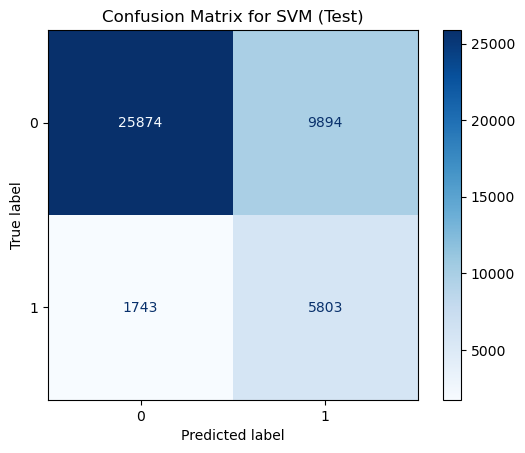

In [108]:
yhat_svm_test=svm_cv.predict(X_test)
cm = confusion_matrix(Y_test, yhat_svm_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot(cmap=plt.cm.Blues)
plt.title(f"Confusion Matrix for SVM (Test)")
plt.show()

### Check again with train dataset to prevent overfitting

In [109]:
svm_cv.score(X_train, Y_train)

0.500135747097727

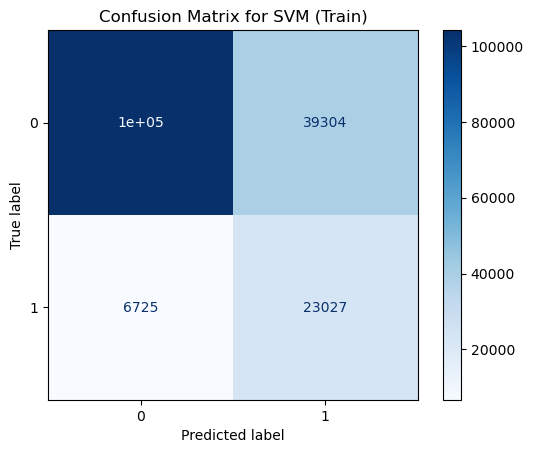

In [111]:
yhat_svm_train=svm_cv.predict(X_train)
cm = confusion_matrix(Y_train, yhat_svm_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot(cmap=plt.cm.Blues)
plt.title(f"Confusion Matrix for SVM (Train)")
plt.show()

In [37]:
athlete_2 = athlete_2[['Height', 'Weight', 'Age', 'Sex', 'NOC']]

In [42]:
athlete_2.groupby('NOC')[['Height', 'Weight', 'Age']].mean().sort_values('Height', ascending=False).head()

,Height,Weight,Age
NOC,,,
CRO,183.681507,81.687215,25.183790
NED,180.053605,74.397328,26.650111
SWE,178.363113,73.868689,26.824200
NOR,178.207460,73.590726,26.796573
DEN,178.200280,73.470308,27.345378


In [43]:
country_means = athlete_2.groupby('NOC')[['Height', 'Weight', 'Age']].mean()

height_rank = country_means.sort_values('Height', ascending=False).index.tolist()
weight_rank = country_means.sort_values('Weight', ascending=False).index.tolist()
age_rank    = country_means.sort_values('Age', ascending=False).index.tolist()

import pandas as pd
ranking_df = pd.DataFrame({
    'Height': height_rank,
    'Weight': weight_rank,
    'Age': age_rank
})

ranking_df.head(10)

,Height,Weight,Age
0,CRO,CRO,BEL
1,NED,GRE,DEN
2,SWE,NZL,AUT
3,NOR,NED,FRA
4,DEN,ARG,GBR
5,CZE,SWE,GER
6,NZL,YUG,SWE
7,GRE,NOR,NOR
8,BRA,AUT,SUI
9,FRG,DEN,NED


## **CONCLUSION**
I conclude that **Tree Classification** is the best model. There was a great balance between focusing on details and preventing overfitting. The result for both the testing and training dataset was pretty close to each other and reasonable. **85%** of true prediction is an acceptable result for sport results.

**The parameters for this model would be:**

**criterion**: 'gini',

**max_depth**: 30,

**max_features**: 'sqrt',

**min_samples_leaf**: 3,

**min_samples_split**: 20,

**splitter**: 'best'

## **NEW METRIC**
I created the BMI column. I believe that correlations should not be counted on each variable itself. It is better to combine them, and BMI is a good variable to consider.

## **CORRELATION**
In terms of country, there was higher chance for athlete coming from USA and USR. Still, since USR is no longer exist, Americans dominate the Olympics. However, the correlation was only about 0.1, which means there is relation but not strong enough to conclude.

Another thing is that height and weight have high correlation with each other. However, this is not a surprising finding since higher people tend to have heavier bones and muscle, resulting in higher weights.

In terms of the final table, I can get some insights:
1. Athletes from Croatia and the Netherlands have the greatest average height, suggesting that Northern and Eastern European countries tend to produce taller athletes.
2. Croatia again ranks first in average weight, while Greece and New Zealand follow closely, indicating that body mass does not always correlate directly with height but may reflect sport type and physical build.
3. Belgium and Denmark show the highest average ages among athletes, implying that these countries may have more experienced or veteran competitors.